## The optimal composition of the portfolio
### Vol 1
#### 17.04.2019

In [1]:
# connection necessary packeges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Helpfull function

In [2]:
# normalize data
def norma(data):
    data = np.array(data)
    return np.array((data - min(data)) / (max(data) - min(data)))


# profitability of the portfolio
def port_mean(d, means, n_days=250):
    d = np.array(d)
    return np.sum(means * d) * n_days


# volatility of the portfolio
def port_vol(d, cov, n_days=250):
    d = np.array(d)
    return np.sqrt(np.dot(d.T, np.dot(cov * n_days, d)))

### Download indexes

In [3]:
# download and calculate data
# data parse
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y')
index = pd.read_csv('https://raw.githubusercontent.com/Aurilino/Diploma/master/MAIN_DATA/MOEXBC_c.csv'
                    , header=0, index_col=0, parse_dates={'Index_Date': [0]}, date_parser=dateparse,  sep=';')
bond = pd.read_csv('https://raw.githubusercontent.com/Aurilino/Diploma/master/MAIN_DATA/RGBITR_c.csv '
                    , header=0, index_col=0, parse_dates={'Index_Date': [0]}, date_parser=dateparse,  sep=';')
temp = ['OPEN', 'HIGH', 'LOW', 'VALUE', 'DURATION', 'YIELD', 'DECIMALS', 'CAPITALIZATION', 'CURRENCYID', 'DIVISOR']
for i in temp:
    del index[i]
    del bond[i]
# index = index[index.index >= '2014-01-01']
# bond = bond[bond.index >= '2014-01-01']

In [4]:
index.head()

,CLOSE
Index_Date,
2012-04-02,10385.31
2012-04-03,10581.19
2012-04-04,10337.60
2012-04-05,10427.70
2012-04-06,10240.05


In [5]:
index.tail()

,CLOSE
Index_Date,
2019-04-16,17270.27
2019-04-17,17339.05
2019-04-18,17276.30
2019-04-19,17292.18
2019-04-22,17445.28


In [6]:
main = pd.merge(index, bond, left_index=True, right_index=True)
main.columns = ['Index', 'Bond']
# main = main.sort_index()
main = main.apply(lambda x: (x - x.shift(1)) / x.shift(1))
main.dropna(inplace = True)
means = np.mean(main)
cov = np.cov(main, rowvar=False)
risk = np.std(main)
main.tail()

,Index,Bond
Index_Date,,
2019-04-16,0.005472,-0.000503
2019-04-17,0.003983,0.000905
2019-04-18,-0.003619,-0.001085
2019-04-19,0.000919,0.000503
2019-04-22,0.008854,0.000724


In [7]:
cov

array([[1.36855002e-04, 9.40594871e-06],
       [9.40594871e-06, 1.82454667e-05]])

In [8]:
means

Index    0.000361
Bond     0.000325
dtype: float64

In [9]:
risk

Index    0.011695
Bond     0.004270
dtype: float64

In [10]:
z = len(main.index)

In [11]:
main['Index_add'] = 1
main['Bond_add'] = 1
for i in range(1, z):
    main.iloc[i, 2] = index.iloc[i, 0] / index.iloc[0, 0]
    main.iloc[i, 3] = bond.iloc[i, 0] / bond.iloc[0, 0]
main.tail()

,Index,Bond,Index_add,Bond_add
Index_Date,,,,
2019-04-16,0.005472,-0.000503,1.653902,1.751329
2019-04-17,0.003983,0.000905,1.662952,1.750449
2019-04-18,-0.003619,-0.001085,1.669575,1.752033
2019-04-19,0.000919,0.000503,1.663532,1.750132
2019-04-22,0.008854,0.000724,1.665062,1.751012


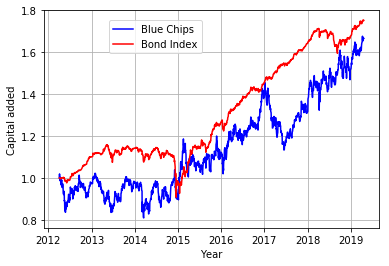

In [12]:
# _=plt.figure(figsize = (15, 10))
_=plt.plot(main.index.values, main['Index_add'], c = 'b', marker='', label = 'Blue Chips')
_=plt.plot(main.index.values, main['Bond_add'], c = 'r', marker='', label = 'Bond Index')
_=plt.legend(bbox_to_anchor=(.5, 1), loc = 1, borderaxespad = 1)
_=plt.grid(True)
ax = plt.gca()
_=ax.set_xlabel('Year', fontsize=10)
_=ax.set_ylabel('Capital added', fontsize=10)
# _=plt.axvline(x = 250, color='r', linestyle='--')

In [13]:
index.iloc[len(index.index) - 1, 0] / index.iloc[0, 0]

1.679803491662743

In [14]:
bond.iloc[len(bond.index) - 1, 0] / bond.iloc[0, 0]

1.7522796887652714

### Blue chips

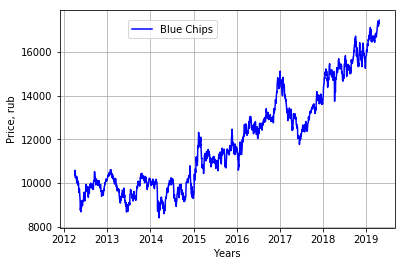

In [15]:
# _=plt.figure(figsize = (15, 10))
_=plt.plot(index.index.values,  index['CLOSE'], c = 'b', marker='', label = 'Blue Chips')
_=plt.legend(bbox_to_anchor=(.5, 1), loc = 1, borderaxespad = 1)
_=plt.grid(True)
# _=plt.xticks(range(z), xt)
ax = plt.gca()
_=ax.set_xlabel('Years', fontsize=10)
_=ax.set_ylabel('Price, rub', fontsize=10)

In [16]:
index_d = main['Index']

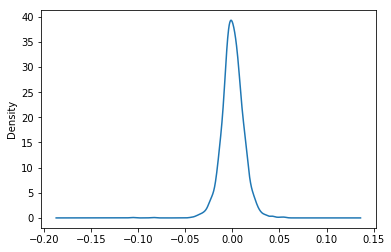

In [17]:
index_d.plot.kde()

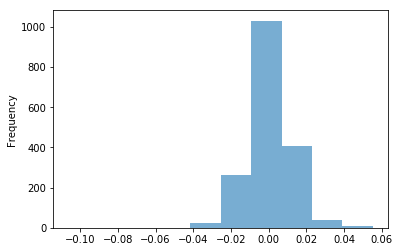

In [18]:
index_d.plot.hist(alpha=0.6)

In [19]:
m_i = np.mean(main['Index'])
s_i = np.std(main['Index'])
print(round(m_i * 100, 5), round(m_i * 252 * 100, 5))
print(round(s_i * 100, 5), round(s_i * np.sqrt(252) * 100, 5))

0.03607 9.0906
1.16952 18.56557


### Bond index

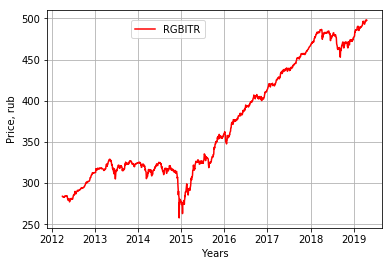

In [20]:
# _=plt.figure(figsize = (15, 10))
_=plt.plot(bond.index.values,  bond['CLOSE'], c = 'r', marker='', label = 'RGBITR')
_=plt.legend(bbox_to_anchor=(.5, 1), loc = 1, borderaxespad = 1)
_=plt.grid(True)
ax = plt.gca()
_=ax.set_xlabel('Years', fontsize=10)
_=ax.set_ylabel('Price, rub', fontsize=10)

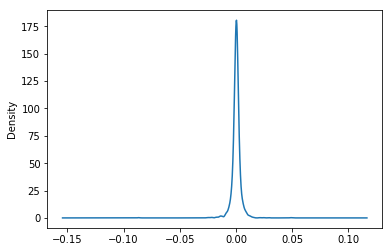

In [21]:
index_b = main['Bond']
index_b.plot.kde()

In [22]:
m_i = np.mean(main['Bond'])
s_i = np.std(main['Bond'])
print(round(m_i * 100, 5), round(m_i * 252 * 100, 5))
print(round(s_i * 100, 5), round(s_i * np.sqrt(252) * 100, 5))

0.03251 8.19286
0.42703 6.77884


## Profitability, risk and VaR of all possible portfolio options

In [23]:
look_index = list(main['Index'])
look_bond = list(main['Bond'])
df = pd.DataFrame({'INDEX': look_index, 'BOND': look_bond})
df.index = main.index
df.index.name = 'Date'
df['Year'] = [str(i)[:4] for i in list(df.index)]
df['Flag'] = 0
for i in range(1, len(df.index)):
    b = i - 1
    if df.iloc[i, 2] != df.iloc[b, 2]: 
        df.iloc[i, 3] = 1
df.head()

,INDEX,BOND,Year,Flag
Date,,,,
2012-04-03,0.018861,0.000211,2012,0
2012-04-04,-0.023021,-0.000986,2012,0
2012-04-05,0.008716,0.000141,2012,0
2012-04-06,-0.017995,-0.000564,2012,0
2012-04-09,0.007783,-0.001128,2012,0


In [24]:
port = pd.DataFrame()
a_assets = [i / 100 for i in range(0, 101, 5)]
b_assets = [round(1 - i, 2) for i in a_assets]
names = []
for asset in range(len(a_assets)):
    name = 'r(' + str(a_assets[asset]) + ') / ' + 'b(' + str(b_assets[asset]) + ')'
    names.append(name)
    port[name] = df['INDEX'] * a_assets[asset] + df['BOND'] * b_assets[asset]  
port.head()

,r(0.0) / b(1.0),r(0.05) / b(0.95),r(0.1) / b(0.9),r(0.15) / b(0.85),r(0.2) / b(0.8),r(0.25) / b(0.75),r(0.3) / b(0.7),r(0.35) / b(0.65),r(0.4) / b(0.6),r(0.45) / b(0.55),...,r(0.55) / b(0.45),r(0.6) / b(0.4),r(0.65) / b(0.35),r(0.7) / b(0.3),r(0.75) / b(0.25),r(0.8) / b(0.2),r(0.85) / b(0.15),r(0.9) / b(0.1),r(0.95) / b(0.05),r(1.0) / b(0.0)
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-03,0.000211,0.001144,0.002076,0.003009,0.003941,0.004874,0.005806,0.006739,0.007671,0.008604,...,0.010469,0.011401,0.012334,0.013266,0.014199,0.015131,0.016064,0.016996,0.017929,0.018861
2012-04-04,-0.000986,-0.002087,-0.003189,-0.004291,-0.005393,-0.006494,-0.007596,-0.008698,-0.009800,-0.010902,...,-0.013105,-0.014207,-0.015309,-0.016410,-0.017512,-0.018614,-0.019716,-0.020817,-0.021919,-0.023021
2012-04-05,0.000141,0.000570,0.000998,0.001427,0.001856,0.002285,0.002713,0.003142,0.003571,0.004000,...,0.004857,0.005286,0.005715,0.006143,0.006572,0.007001,0.007430,0.007858,0.008287,0.008716
2012-04-06,-0.000564,-0.001435,-0.002307,-0.003178,-0.004050,-0.004922,-0.005793,-0.006665,-0.007536,-0.008408,...,-0.010151,-0.011023,-0.011894,-0.012766,-0.013637,-0.014509,-0.015381,-0.016252,-0.017124,-0.017995
2012-04-09,-0.001128,-0.000682,-0.000237,0.000209,0.000654,0.001100,0.001545,0.001991,0.002436,0.002882,...,0.003773,0.004219,0.004664,0.005110,0.005555,0.006001,0.006446,0.006892,0.007338,0.007783


In [25]:
means = np.mean(port) 
risk = np.std(port) 
var = []
col = list(port.columns)
for i in col:
    num = sorted(list(port[i]))
    var.append(-np.percentile(num, 5))
char = pd.DataFrame({'Means': means, 'Risk': risk, 'VaR': var})
char.index = names
char.head()

,Means,Risk,VaR
r(0.0) / b(1.0),0.000325,0.004270,0.004741
r(0.05) / b(0.95),0.000327,0.004206,0.004936
r(0.1) / b(0.9),0.000329,0.004223,0.005016
r(0.15) / b(0.85),0.000330,0.004319,0.005258
r(0.2) / b(0.8),0.000332,0.004489,0.005522


In [26]:
ma = list(means - risk).index(max(means - risk))
ma

1

In [27]:
b_assets[ma]

0.95

In [28]:
mv = list(means - norma(var)).index(max(means - norma(var)))
mv

0

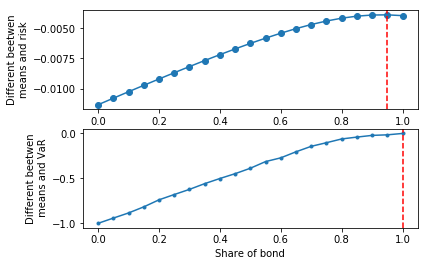

In [29]:
_=plt.subplot(2, 1, 1)
_=plt.plot(b_assets, means - risk, 'o-')
_=plt.ylabel('Different beetwen' + '\n' + 'means and risk')
_=plt.axvline(x = b_assets[ma], color='r', linestyle='--')
_=plt.subplot(2, 1, 2)
_=plt.plot(b_assets, means - norma(var), '.-')
_=plt.xlabel('Share of bond')
_=plt.ylabel('Different beetwen' + '\n' + ' means and VaR')
_=plt.axvline(x = b_assets[mv], color='r', linestyle='--')

In [30]:
char.tail()

,Means,Risk,VaR
r(0.8) / b(0.2),0.000354,0.009554,0.014164
r(0.85) / b(0.15),0.000355,0.010081,0.015163
r(0.9) / b(0.1),0.000357,0.010614,0.016028
r(0.95) / b(0.05),0.000359,0.011153,0.016758
r(1.0) / b(0.0),0.000361,0.011695,0.017500


In [31]:
z = len(char.index)

In [32]:
# _=plt.axvline(x = 250, color='r', linestyle='--')

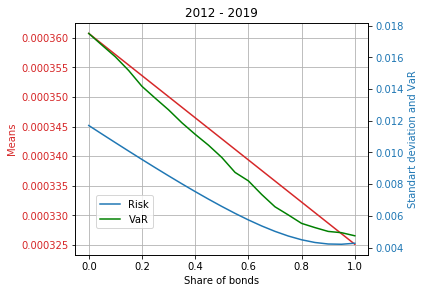

In [33]:
_=fig, ax1 = plt.subplots()
_=plt.grid(True)
_=color = 'tab:red'
_=ax1.set_xlabel('Share of bonds')
_=ax1.set_ylabel('Means', color=color)
_=ax1.plot(b_assets, char['Means'], color=color, label = 'Means')
_=ax1.tick_params(axis='y', labelcolor=color)
_=ax2 = ax1.twinx()  
_=color = 'tab:blue'
_=ax2.set_ylabel('Standart deviation and VaR', color=color)  
_=ax2.plot(b_assets, char['Risk'], color=color, label = 'Risk')
_=ax2.plot(b_assets, char['VaR'], color='green', label = 'VaR')
_=ax2.tick_params(axis='y', labelcolor=color)
_=fig.tight_layout()  
_=plt.legend(bbox_to_anchor=(.3, .3), loc = 1, borderaxespad = 1)
_=plt.title('2012 - 2019')

## Profitability, risk and VaR of all possible portfolio options in each year

In [34]:
df = pd.DataFrame({'INDEX': list(main['Index']), 'BOND': list(main['Bond'])})
df.index = main.index
df['Year'] = 0
for i in range(len(df.index)):
    df.iloc[i, 2] = str(list(df.index)[i])[:4]
df.head()

,INDEX,BOND,Year
Date,,,
2012-04-03,0.018861,0.000211,2012
2012-04-04,-0.023021,-0.000986,2012
2012-04-05,0.008716,0.000141,2012
2012-04-06,-0.017995,-0.000564,2012
2012-04-09,0.007783,-0.001128,2012


In [35]:
df['Flag'] = 0
for i in range(1, len(df.index)):
    b = i - 1 
    if df.iloc[i, 2] != df.iloc[b, 2] or i == len(df.index) - 1:
        df.iloc[i, 3] = 1
df.head()

,INDEX,BOND,Year,Flag
Date,,,,
2012-04-03,0.018861,0.000211,2012,0
2012-04-04,-0.023021,-0.000986,2012,0
2012-04-05,0.008716,0.000141,2012,0
2012-04-06,-0.017995,-0.000564,2012,0
2012-04-09,0.007783,-0.001128,2012,0


In [36]:
print(sum(df['Flag']))
df.tail() 

8


,INDEX,BOND,Year,Flag
Date,,,,
2019-04-16,0.005472,-0.000503,2019,0
2019-04-17,0.003983,0.000905,2019,0
2019-04-18,-0.003619,-0.001085,2019,0
2019-04-19,0.000919,0.000503,2019,0
2019-04-22,0.008854,0.000724,2019,1


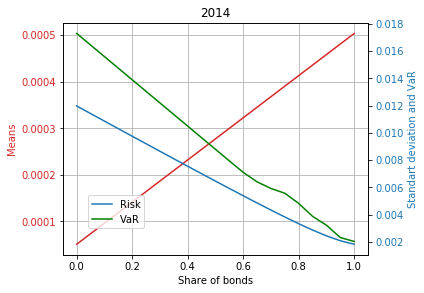

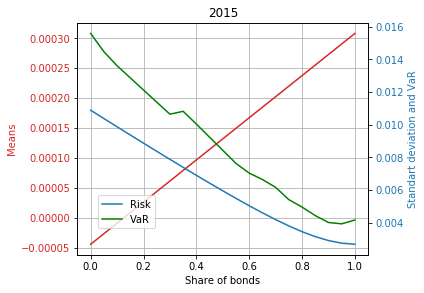

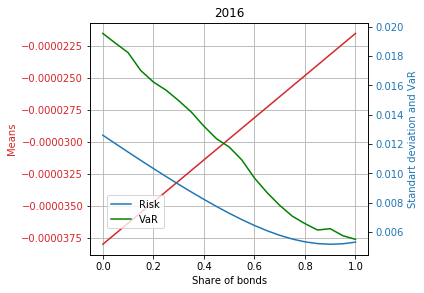

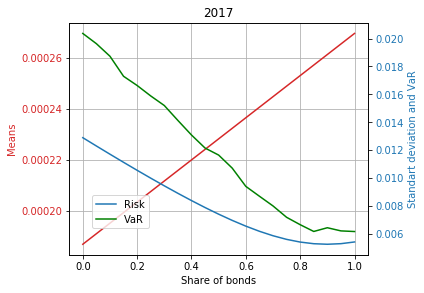

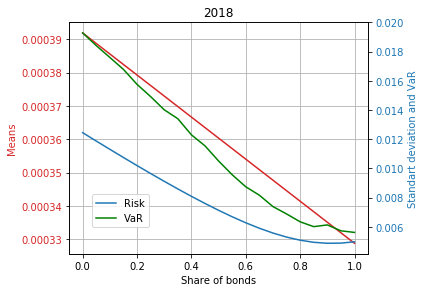

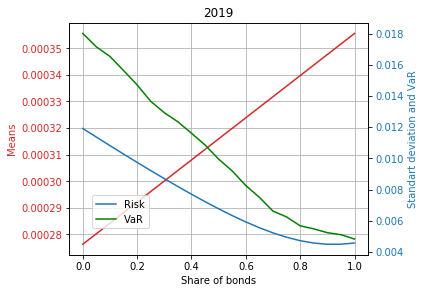

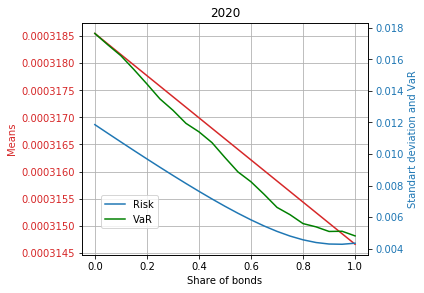

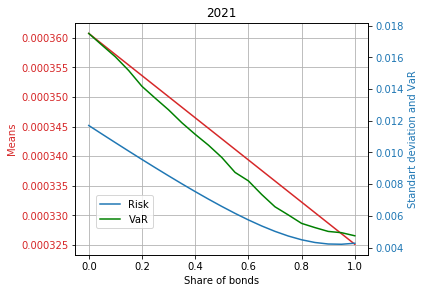

In [37]:
start = str(df.index[0])[:10]
stop = ''
n = int(0)
year = 2014
for i in list(df['Flag']):
    if i == 1:
        n += 1
        stop = str(df.index[n - 1])[:10]
        block = df[df.index >= start]
        block = df[df.index <= stop]
        port = pd.DataFrame()
        a_assets = [i / 100 for i in range(0, 101, 5)]
        b_assets = [round(1 - i, 2) for i in a_assets]
        names = []
        for asset in range(len(a_assets)):
            name = 'r(' + str(a_assets[asset]) + ') / ' + 'b(' + str(b_assets[asset]) + ')'
            names.append(name)
            port[name] = block['INDEX'] * a_assets[asset] + block['BOND'] * b_assets[asset]  
        means = np.mean(port) 
        risk = np.std(port) 
        var = []
        col = list(port.columns)
        for i in col:
            num = sorted(list(port[i]))
            var.append(-np.percentile(num, 5))
        char = pd.DataFrame({'Means': means, 'Risk': risk, 'VaR': var})
        char.index = names
        _=fig, ax1 = plt.subplots()
        _=plt.grid(True)
        _=color = 'tab:red'
        _=ax1.set_xlabel('Share of bonds')
        _=ax1.set_ylabel('Means', color=color)
        _=ax1.plot(b_assets, char['Means'], color=color, label = 'Means')
        _=ax1.tick_params(axis='y', labelcolor=color)
        _=ax2 = ax1.twinx()  
        _=color = 'tab:blue'
        _=ax2.set_ylabel('Standart deviation and VaR', color=color)  
        _=ax2.plot(b_assets, char['Risk'], color=color, label = 'Risk')
        _=ax2.plot(b_assets, char['VaR'], color='green', label = 'VaR')
        _=ax2.tick_params(axis='y', labelcolor=color)
        _=fig.tight_layout()  
        _=plt.legend(bbox_to_anchor=(.3, .3), loc = 1, borderaxespad = 1)
        _=plt.title(year)
        _=plt.show()
        year += 1
    else:
        n += 1
        if start != str(df.index[0])[:10]:
            start = stop

## Normalize data

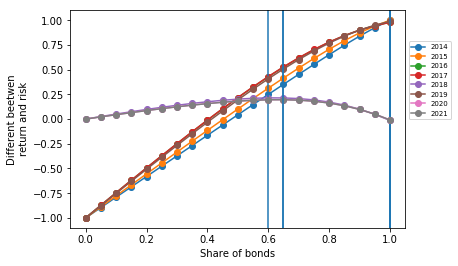

In [38]:
# Risk
start = str(df.index[0])[:10]
stop = ''
n = int(0)
year = 2014
weight_risk = []
signal = 0
for i in list(df['Flag']):
    if i == 1:
        signal = 1
        n += 1
        stop = str(df.index[n-1])[:10]
        block = df[df.index >= start]
        block = df[df.index <= stop]
        port = pd.DataFrame()
        a_assets = [i / 100 for i in range(0, 101, 5)]
        b_assets = [round(1 - i, 2) for i in a_assets]
        names = []
        for asset in range(len(a_assets)):
            name = 'r(' + str(a_assets[asset]) + ') / ' + 'b(' + str(b_assets[asset]) + ')'
            names.append(name)
            port[name] = block['INDEX'] * a_assets[asset] + block['BOND'] * b_assets[asset]  
        means = np.mean(port) 
        risk = np.std(port) 
        means = norma(means)
        risk = norma(risk)
        ma = list(means - risk).index(max(means - risk))
        _=plt.plot(b_assets, means - risk, 'o-', label = year)
        _=plt.ylabel('Different beetwen' + '\n' + 'return and risk')
        _=plt.axvline(x = b_assets[ma])
        _=plt.legend(loc = (1.01, .5), fontsize = 'x-small')
        _=plt.xlabel('Share of bonds')
        year += 1
        weight_risk.append(b_assets[ma])
    else:
        n += 1
        if signal == 1:
            start = stop
        signal = 0

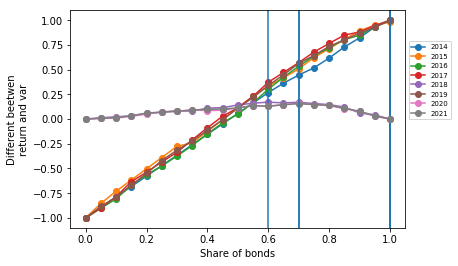

In [39]:
# Risk
start = str(df.index[0])[:10]
stop = ''
n = int(0)
year = 2014
weight_var = []
signal = 0
for i in list(df['Flag']):
    if i == 1:
        signal = 1
        n += 1
        stop = str(df.index[n-1])[:10]
        block = df[df.index >= start]
        block = df[df.index <= stop]
        port = pd.DataFrame()
        a_assets = [i / 100 for i in range(0, 101, 5)]
        b_assets = [round(1 - i, 2) for i in a_assets]
        names = []
        for asset in range(len(a_assets)):
            name = 'r(' + str(a_assets[asset]) + ') / ' + 'b(' + str(b_assets[asset]) + ')'
            names.append(name)
            port[name] = block['INDEX'] * a_assets[asset] + block['BOND'] * b_assets[asset]  
        means = np.mean(port)
        var = []
        col = list(port.columns)
        for i in col:
            num = sorted(list(port[i]))
            var.append(-np.percentile(num, 5))
        means = norma(means)
        var = norma(var)
        ma = list(means - risk).index(max(means - risk))
        mv = list(means - var).index(max(means - var))
        _=plt.plot(b_assets, means - var, 'o-', label = year)
        _=plt.ylabel('Different beetwen' + '\n' + 'return and var')
        _=plt.axvline(x = b_assets[mv])
        _=plt.legend(loc='upper right', fontsize = 'x-small')
        _=plt.legend(loc = (1.01, .5), fontsize = 'x-small')
        _=plt.xlabel('Share of bonds')
        year += 1
        weight_var.append(b_assets[mv])
    else:
        n += 1
        if signal == 1:
            start = stop
        signal = 0

In [41]:
weight = pd.DataFrame({'Min Risk': weight_risk, 'Min VaR': weight_var})
weight.index = range(2012, 2020)
weight.index.name = 'Year'
weight

,Min Risk,Min VaR
Year,,
2012,1.00,1.0
2013,1.00,1.0
2014,1.00,1.0
2015,1.00,1.0
2016,0.60,0.6
2017,1.00,1.0
2018,0.65,0.7
2019,0.65,0.7


## Effective frontier

In [42]:
lock = main.iloc[:, :2]

In [43]:
means = np.mean(lock)
cov = np.cov(lock, rowvar=False)

In [44]:
means

Index    0.000361
Bond     0.000325
dtype: float64

In [45]:
cov

array([[1.36855002e-04, 9.40594871e-06],
       [9.40594871e-06, 1.82454667e-05]])

In [46]:
n_assets = 2

In [47]:
# generate all posible portfolio
block = pd.DataFrame({'Index': [(1000 - i) / 1000 for i in range(1001)], 'Bond': [(0 + i) / 1000 for i in range(1001)]})
n_assets = 2
r_f = .075
# calculate 
block['Sum'] = block.sum(axis=1)
block['Mu'] = 0
block['Volatility'] = 0
block.head()

,Index,Bond,Sum,Mu,Volatility
0,1.000,0.000,1.0,0,0
1,0.999,0.001,1.0,0,0
2,0.998,0.002,1.0,0,0
3,0.997,0.003,1.0,0,0
4,0.996,0.004,1.0,0,0


In [48]:
z = len(block.index)

In [49]:
num = 0
for i in range(z):
    d = np.array(block.iloc[i, :n_assets])
    block.iloc[i, (n_assets + 1)] = port_mean(d, means, n_days=250)
    block.iloc[i, (n_assets + 2)] = port_vol(d, cov, n_days=250)
block['Sharp_ratio'] = (block['Mu'] - r_f) / block['Volatility']
block.tail()

,Index,Bond,Sum,Mu,Volatility,Sharp_ratio
996,0.004,0.996,1.0,0.081314,0.067411,0.093664
997,0.003,0.997,1.0,0.081305,0.067442,0.093489
998,0.002,0.998,1.0,0.081296,0.067473,0.093313
999,0.001,0.999,1.0,0.081287,0.067505,0.093137
1000,0.000,1.000,1.0,0.081278,0.067538,0.092960


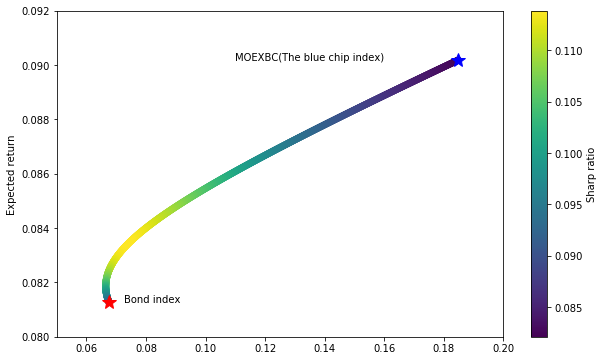

In [54]:
_=plt.figure(figsize = (10, 6))
_=plt.scatter(block['Volatility'], block['Mu'], c = block['Sharp_ratio'], marker = 'o')
_=plt.plot(block.iloc[0, 4], block.iloc[0, 3],'b*', markersize=15)
_=plt.plot(block.iloc[z-1, 4], block.iloc[z-1, 3],'r*', markersize=15)
_=plt.annotate('MOEXBC(The blue chip index)', xy=(block.iloc[0, 4] - .075, block.iloc[0, 3]))
_=plt.annotate('Bond index', xy=(block.iloc[len(block.index) - 1, 4] + .005, block.iloc[len(block.index) - 1, 3]))
_=plt.ylabel('Expected return')
_=plt.colorbar(label='Sharp ratio')
_=plt.ylim(.08, .092)
_=plt.xlim(.05, .2)